In [10]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

In [4]:
# '증권' 테마 종목파일 불러오기
upjong_list = pd.read_csv('./upjong_sort_20201006.csv')
bank_list = upjong_list[upjong_list['업종']=='증권']
bank_list = bank_list[bank_list['코스닥여부']=='N']
bank_list.drop('Unnamed: 0', axis=1, inplace = True)
bank_list = bank_list.reset_index()
bank_list.drop('index', axis=1, inplace = True)

In [5]:
# '증권'테마의 종목df를 묶음 저장하는 df_list 생성
df_list=[]

for i in range(len(bank_list)):
    code = bank_list['종목코드'][i]
    
    df = fdr.DataReader(code, '2019')
    df_list.append(df)    

In [87]:
df_list

[            Open  High   Low  Close   Volume    Change
 Date                                                  
 2019-01-02  3955  4350  3880   3965  1339833  0.053121
 2019-01-03  3825  3965  3415   3450  1150164 -0.129887
 2019-01-04  3540  3995  3350   3770  1242370  0.092754
 2019-01-07  3650  3875  3500   3575   987904 -0.051724
 2019-01-08  3575  3605  3220   3290   618024 -0.079720
 ...          ...   ...   ...    ...      ...       ...
 2020-10-13  5410  5420  5210   5370    45781  0.001866
 2020-10-14  5450  5590  5300   5300    87021 -0.013035
 2020-10-15  5400  5920  5200   5540   566021  0.045283
 2020-10-16  5550  6900  5550   5830  4324300  0.052347
 2020-10-19  5770  5770  5250   5430   516957 -0.068611
 
 [443 rows x 6 columns],
             Open  High   Low  Close   Volume    Change
 Date                                                  
 2019-01-02  1800  1890  1775   1850   197679  0.016484
 2019-01-03  1880  1880  1780   1830   179245 -0.010811
 2019-01-04  1800  18

In [6]:
# '증권' 테마의 2019~2020 평균 종가 'bank_close'
close = 0
for i in range(len(df_list)):        
    close = close + df_list[i]['Close']

bank_close = close / len(df_list)

In [7]:
# 2019~2020 코스피 지수
kospi = fdr.DataReader('KS11', '2019')

In [11]:
# 비교를위한 MinMaxScaled
def minmaxscaled(df):
    scaler = MinMaxScaler()
    scale_cols = ['Close']
    df_scaled = scaler.fit_transform(df[scale_cols])

    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = scale_cols
    return df_scaled

In [12]:
# 스케일링
kospi_scaled = minmaxscaled(kospi)

bank_close = pd.DataFrame(bank_close)
bank_scaled = minmaxscaled(bank_close)

df_001515_scaled =minmaxscaled(df_list[0])

In [13]:
# 상관관계 확인
data = {
     'kospi' : kospi_scaled['Close']
    ,'bank' : bank_scaled['Close']
    ,'001515' : df_001515_scaled['Close']
}
corr_df = pd.DataFrame(data)
corr_df.corr()

kospi      bank    001515
kospi   1.000000  0.728731  0.554985
bank    0.728731  1.000000  0.157060
001515  0.554985  0.157060  1.000000

In [14]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

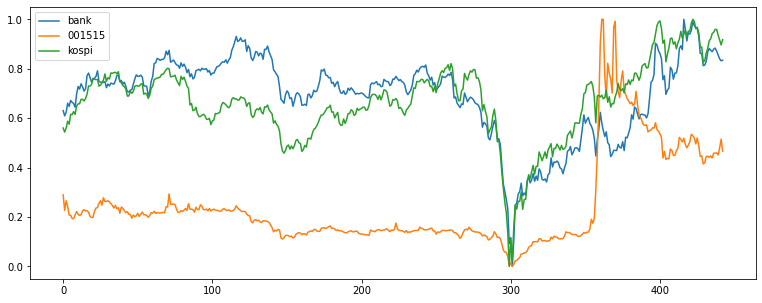

In [15]:
plt.figure(figsize=(13, 5))

plt.plot(
      bank_scaled.index
    , bank_scaled
    , label = 'bank'
)

plt.plot(
    df_001515_scaled.index
    , df_001515_scaled
    , label = '001515'
)

plt.plot(
    kospi_scaled.index
    , kospi_scaled
    , label = 'kospi'
)

plt.legend()
plt.show()

### ta-lib 활용

In [1]:
import talib.abstract as ta

In [91]:
samsung = fdr.DataReader('005930', '2019')
samsung.columns=['open','high','low','close', 'volume', 'change']
kospi = fdr.DataReader('KS11', '2019')
kospi.columns=['open','high','low','close', 'volume', 'change']

In [92]:
# 기간별 삼성전자 종가 이동평균 계산
samsung['ma5'] = ta.MA(samsung, timeperiod=5)
samsung['ma10'] = ta.MA(samsung, timeperiod=10)
samsung['ma20'] = ta.MA(samsung, timeperiod=20)
samsung['ma60'] = ta.MA(samsung, timeperiod=60)
samsung['ma120'] = ta.MA(samsung, timeperiod=120)

# 기간별 코스피지수 종가 이동평균 계산
samsung['kospi_ma5'] = ta.MA(kospi, timeperiod=5)
samsung['kospi_ma10'] = ta.MA(kospi, timeperiod=10)
samsung['kospi_ma20'] = ta.MA(kospi, timeperiod=20)
samsung['kospi_ma60'] = ta.MA(kospi, timeperiod=60)
samsung['kospi_ma120'] = ta.MA(kospi, timeperiod=120)

In [93]:
# 볼린저 밴드
samsung['upperband'], samsung['middleband'], samsung['lowerband'] = \
ta.BBANDS(samsung.close)

In [94]:
samsung

open   high    low  close    volume    change      ma5     ma10  \
Date                                                                           
2019-01-02  39400  39400  38550  38750   7847664  0.001292      NaN      NaN   
2019-01-03  38300  38550  37450  37600  12471493 -0.029677      NaN      NaN   
2019-01-04  37450  37600  36850  37450  14108958 -0.003989      NaN      NaN   
2019-01-07  38000  38900  37800  38750  12748997  0.034713      NaN      NaN   
2019-01-08  38000  39200  37950  38100  12756554 -0.016774  38130.0      NaN   
...           ...    ...    ...    ...       ...       ...      ...      ...   
2020-10-13  61000  61400  60400  60900  19247631  0.008278  59980.0  59070.0   
2020-10-14  61000  61100  60500  60900  16086716  0.000000  60360.0  59380.0   
2020-10-15  60700  60800  59700  60000  17756232 -0.014778  60380.0  59590.0   
2020-10-16  60000  60400  59000  59500  16554190 -0.008333  60340.0  59720.0   
2020-10-19  59600  60200  59600  59800   9460854  0.005042  60220.0  59880.0   

               ma20          ma60         ma120  kospi_ma5  kospi_ma10  \
Date                                                                     
2019-01-02      NaN           NaN           NaN        NaN         NaN   
2019-01-03      NaN           NaN           NaN        NaN         NaN   
2019-01-04      NaN           NaN           NaN        NaN         NaN   
2019-01-07      NaN           NaN           NaN        NaN         NaN   
2019-01-08      NaN           NaN           NaN   2006.988         NaN   
...             ...           ...           ...        ...         ...   
2020-10-13  59305.0  57423.333333  54391.250000   2373.328    2334.234   
2020-10-14  59390.0  57526.666667  54470.416667   2377.358    2344.900   
2020-10-15  59440.0  57630.000000  54552.916667   2377.542    2353.011   
2020-10-16  59395.0  57715.000000  54638.333333   2365.784    2356.382   
2020-10-19  59335.0  57808.333333  54721.250000   2356.328    2359.024   

            kospi_ma20   kospi_ma60  kospi_ma120     upperband  middleband  \
Date                                                                         
2019-01-02         NaN          NaN          NaN           NaN         NaN   
2019-01-03         NaN          NaN          NaN           NaN         NaN   
2019-01-04         NaN          NaN          NaN           NaN         NaN   
2019-01-07         NaN          NaN          NaN           NaN         NaN   
2019-01-08         NaN          NaN          NaN  39230.181803     38130.0   
...                ...          ...          ...           ...         ...   
2020-10-13   2357.7420  2317.429333  2175.033833  61266.234815     59980.0   
2020-10-14   2357.0910  2320.510667  2179.053417  61352.773892     60360.0   
2020-10-15   2355.8280  2323.359333  2182.849833  61338.331884     60380.0   
2020-10-16   2351.5400  2325.645667  2186.877917  61417.775487     60340.0   
2020-10-19   2347.6735  2328.356167  2191.058000  61375.162326     60220.0   

               lowerband  
Date                      
2019-01-02           NaN  
2019-01-03           NaN  
2019-01-04           NaN  
2019-01-07           NaN  
2019-01-08  37029.818197  
...                  ...  
2020-10-13  58693.765185  
2020-10-14  59367.226108  
2020-10-15  59421.668116  
2020-10-16  59262.224513  
2020-10-19  59064.837674  

[443 rows x 19 columns]

In [54]:
# samsung = samsung.astype(float) # data int -> float 